Importare module pentru analiza setului de date si vizualizarea acestuia

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1>O mica vizualizare a setului nostru de date

In [2]:
df = pd.read_csv('MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [3]:
df.shape

(6194, 10)

In [4]:
df.describe(include= 'all')

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
count,6194.000000,6194,6194,6194.000000,6194,4352,6194.000000,6194.000000,6194,1000
unique,NaN,2,2,NaN,3,5,NaN,NaN,14,2
top,NaN,Male,False,NaN,Humanities,White,NaN,NaN,Consulting,Admit
freq,NaN,3943,4352,NaN,2481,1456,NaN,NaN,1619,900
mean,3097.500000,NaN,NaN,3.250714,NaN,NaN,651.092993,5.016952,NaN,NaN
std,1788.198115,NaN,NaN,0.151541,NaN,NaN,49.294883,1.032432,NaN,NaN
min,1.000000,NaN,NaN,2.650000,NaN,NaN,570.000000,1.000000,NaN,NaN
25%,1549.250000,NaN,NaN,3.150000,NaN,NaN,610.000000,4.000000,NaN,NaN
50%,3097.500000,NaN,NaN,3.250000,NaN,NaN,650.000000,5.000000,NaN,NaN
75%,4645.750000,NaN,NaN,3.350000,NaN,NaN,680.000000,6.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [6]:
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

<h2>O mica vizualizare a setului nostru de date

/tmp/ipykernel_959/4262122839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data = df, palette=['#432371','#FAAE7B'])


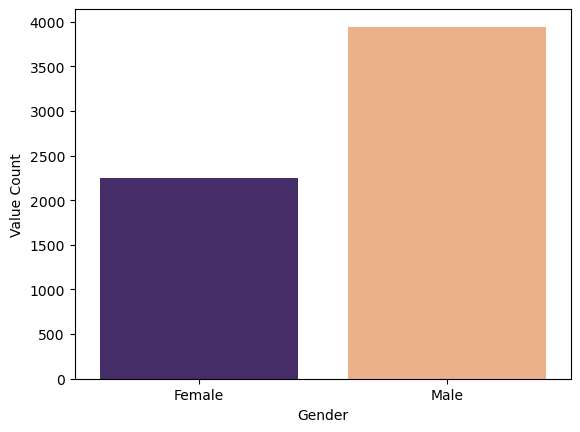

In [7]:
X = df['gender'].value_counts()

sns.countplot(x='gender', data = df, palette=['#432371','#FAAE7B'])
plt.xlabel('Gender')
plt.ylabel('Value Count')

plt.show()


/tmp/ipykernel_959/3482833085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'race', data = df, palette="Set1")


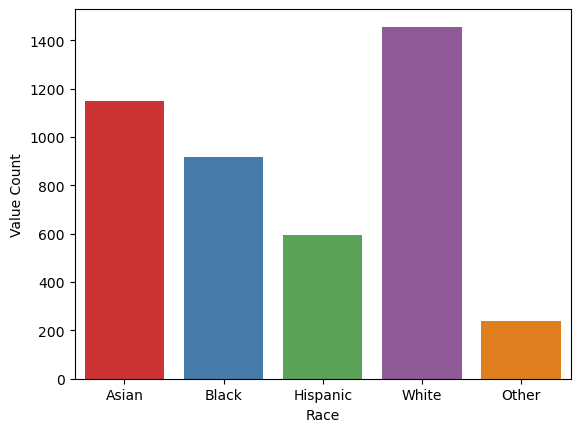

In [8]:
X = df['race'].value_counts()

sns.countplot(x = 'race', data = df, palette="Set1")
plt.xlabel('Race')
plt.ylabel('Value Count')

plt.show()

/tmp/ipykernel_959/1015208375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='major', data = df, palette='Set1')


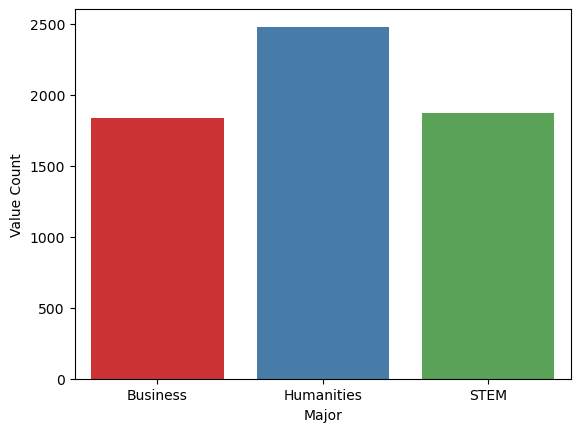

In [9]:
X = df['major'].value_counts()

sns.countplot(x='major', data = df, palette='Set1')
plt.xlabel('Major')
plt.ylabel('Value Count')

plt.show()

/tmp/ipykernel_959/2247489938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_industry', data = df, palette='Set1')


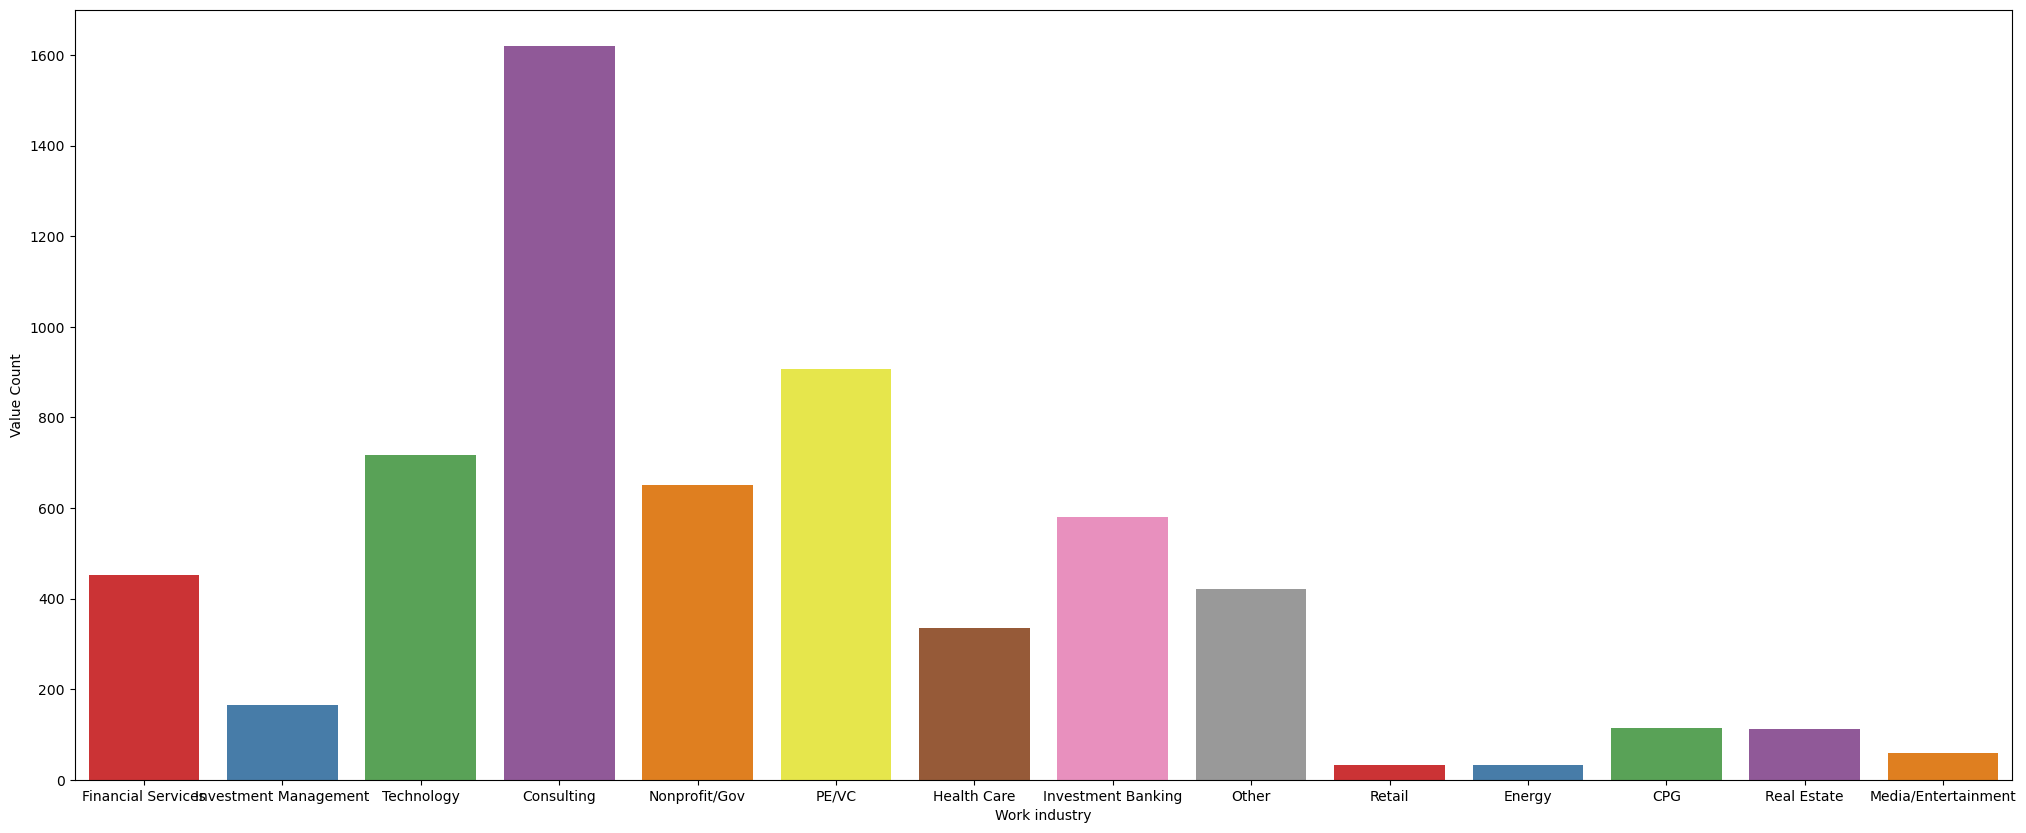

In [10]:
X = df['work_industry'].value_counts()
plt.figure(figsize=(25, 10))
sns.countplot(x='work_industry', data = df, palette='Set1')
plt.xlabel('Work industry')
plt.ylabel('Value Count')
plt.show()

/tmp/ipykernel_959/2216373946.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'admission', data = df, palette = 'Set1')


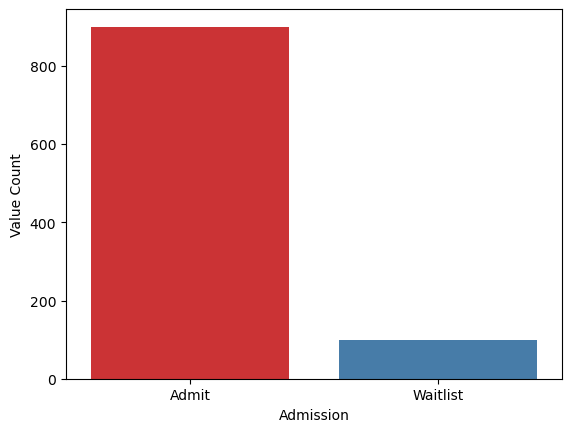

In [11]:
X = df['admission'].value_counts()

sns.countplot(x = 'admission', data = df, palette = 'Set1')
plt.xlabel('Admission')
plt.ylabel('Value Count')

plt.show()

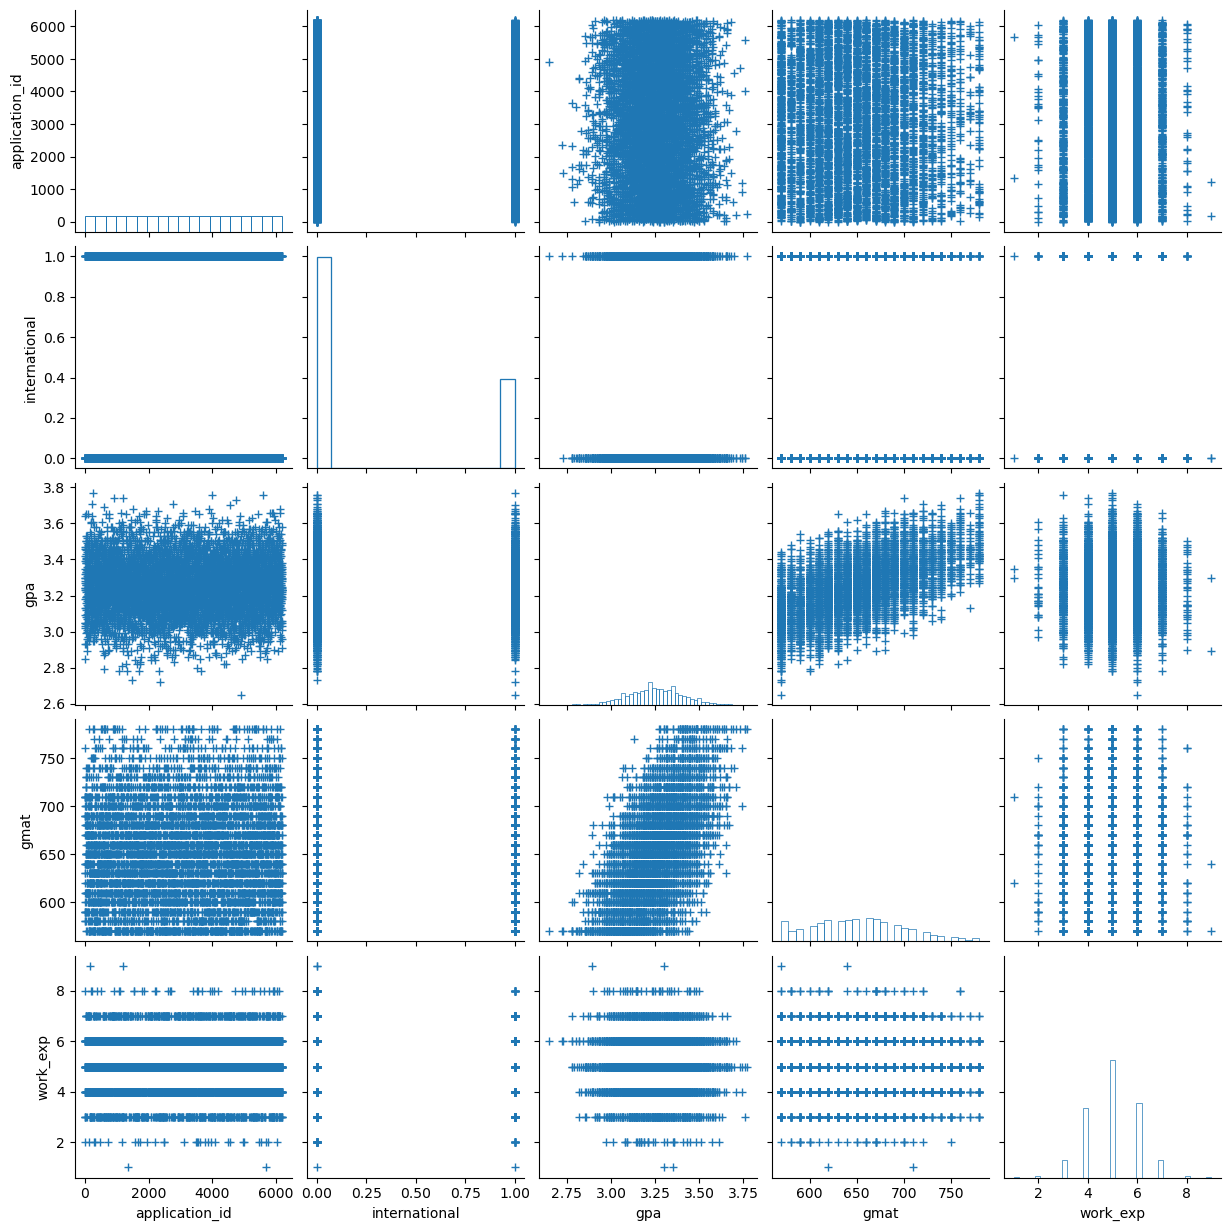

In [12]:
sns.pairplot(
    df,
    plot_kws=dict(marker = '+', linewidth=1),
    diag_kws=dict(fill=False)
     )

In [13]:
numeric_columns = df.select_dtypes(include=[np.number])

print(numeric_columns)

      application_id   gpa   gmat  work_exp
0                  1  3.30  620.0       3.0
1                  2  3.28  680.0       5.0
2                  3  3.30  710.0       5.0
3                  4  3.47  690.0       6.0
4                  5  3.35  590.0       5.0
...              ...   ...    ...       ...
6189            6190  3.49  640.0       5.0
6190            6191  3.18  670.0       4.0
6191            6192  3.22  680.0       5.0
6192            6193  3.36  590.0       5.0
6193            6194  3.23  650.0       4.0

[6194 rows x 4 columns]


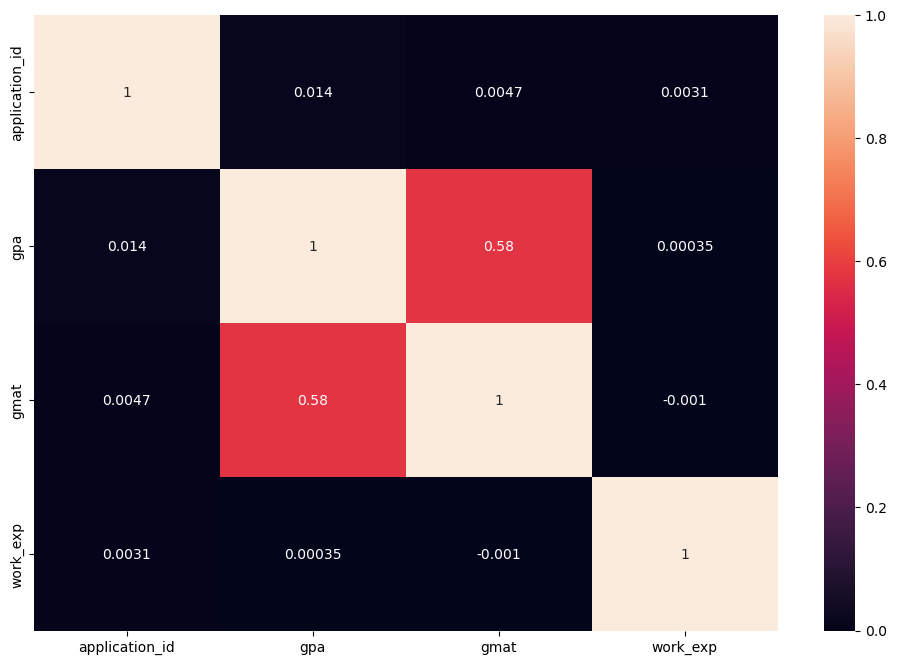

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

<h3>Inlocuirea datelor inscriptionat cu NaN</h3>

In [15]:
#doar pentru race
df['race'].fillna(df['race'].mode()[0], inplace=True)

/tmp/ipykernel_959/2559824550.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(df['race'].mode()[0], inplace=True)


In [16]:
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race                 0
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [17]:
df['gender'].value_counts()

gender
Male      3943
Female    2251
Name: count, dtype: int64

<h3>Maparea setului de date</h3>

In [18]:
df['gender'] = df['gender'].map({'Male' : 1, 'Female' : 0}) # Male -> 1, Female -> 0
df['admission'] = df['admission'].map({'Admit' : 1, 'Waitlist' : 0}).fillna(0) # Admission -> 1, Waitlist -> 0

In [19]:
df.isnull().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

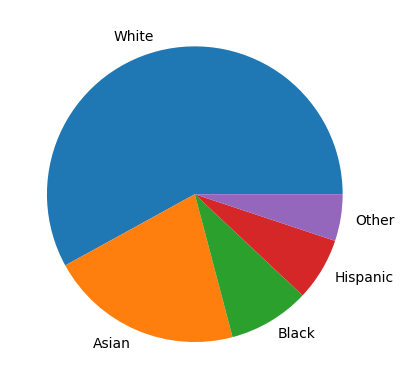

In [20]:
race_admisi = df[df['admission'] == 1]['race']

plt.pie(race_admisi.value_counts(), labels = race_admisi.value_counts().index)
plt.show()

In [21]:
X = df.drop('admission', axis = 1)
X = pd.get_dummies(X, drop_first=True)
y = df['admission']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
y_train.head()

6189    0.0
711     1.0
3954    1.0
1020    1.0
5726    0.0
Name: admission, dtype: float64

In [24]:
RModel = LogisticRegression()

In [25]:
RModel.fit(X_train, y_train)

/home/devid/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
LrPrediction = RModel.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, LrPrediction)
print(f'Accuracy: {accuracy: .2%}')

Accuracy:  84.10%


In [28]:
print(classification_report(y_test, LrPrediction))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      1043
         1.0       0.48      0.06      0.11       196

    accuracy                           0.84      1239
   macro avg       0.66      0.52      0.51      1239
weighted avg       0.79      0.84      0.79      1239



In [29]:
svc_model = SVC()

svc_model.fit(X_train, y_train)
svc_predicition = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, svc_predicition)
print(f'Accuracy: {accuracy: .2%}')

Accuracy:  84.18%


In [30]:
print(classification_report(y_test, svc_predicition))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      1043
         1.0       0.00      0.00      0.00       196

    accuracy                           0.84      1239
   macro avg       0.42      0.50      0.46      1239
weighted avg       0.71      0.84      0.77      1239



/home/devid/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devid/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devid/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
#Kneighbor..
knc_model = KNeighborsClassifier()

knc_model.fit(X_train, y_train)
knc_prediction = knc_model.predict(X_test)
accuracy = accuracy_score(y_test, knc_prediction)
print(f'Accuracy: {accuracy: .2%}')

Accuracy:  82.65%


In [34]:
rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)
rfc_prediction = rfc_model.predict(X_test)
accuracy = accuracy_score(y_test, rfc_prediction)
print(f'Accuracy: {accuracy: .2%}')

Accuracy:  86.84%
